<a href="https://colab.research.google.com/github/oonya/image-processing/blob/master/Binarization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<Figure size 432x288 with 0 Axes>

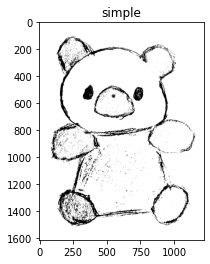

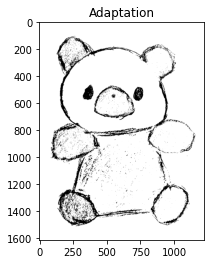

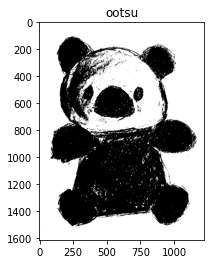

In [ ]:
# hsvのValueで２値化
# 閾値を決めれないことが問題

import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

## 原画像の読み込み
img = cv2.imread('drive/My Drive/latest4.JPG')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


#単純２値化
hsv_img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
value_img = hsv_img[:, :, 2]
binary_img = value_img > 120

plt.gray()
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_title('simple')
ax.imshow(binary_img)


# 適応２値化
# ここでは普通に適応２値化しているがHSVのvalue_imgを使ってやる方でもできた

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
dst = cv2.medianBlur(gray, ksize=13)
dst = cv2.adaptiveThreshold(dst,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,2)

# 膨張・収縮処理
kernel = np.ones((6, 6), np.uint8)
dilate = cv2.dilate(dst, kernel)
erode = cv2.erode(dilate, kernel)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_title('Adaptation')
ax.imshow(binary_img)


# 大津の2値化
ret, th = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_title('ootsu')
ax.imshow(th)

[231.5420505  232.22779559 231.59036258]
[ 10.75472129 220.94070445  18.71268438]
[249.71339605 237.3700126    3.77928293]
[220.98637709  52.46934651  52.77154472]


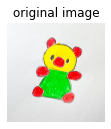

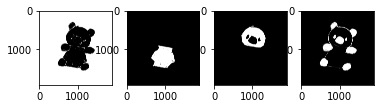

In [2]:
# Kmeansクラスタリング
# 基幹コード

import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

## 原画像の読み込み
img = cv2.imread('drive/My Drive/new_bear.JPG')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(1)
plt.subplot(2,1,1)
plt.imshow(img)
plt.title('original image')
plt.axis('off')



data = np.reshape(img, (img.shape[0]*img.shape[1], img.shape[2])) # クラスタリングのために2次元に直す
n_clusters=4 # クラスタ数(何色に減色するか)
# クラスタリング(K-means)
model = KMeans(n_clusters=n_clusters, random_state=10).fit(data)
labels = model.labels_

plt.figure(2)
data = data[:,0:3]
for l in range(0,n_clusters):
    mean = np.mean(data[labels==l,:], axis=0)
    data[labels==l,:]=mean
    print(mean)

    plt.subplot(1, n_clusters,l+1)
    mask = np.zeros(img.shape[0]*img.shape[1])
    mask[labels==l]=1
    maskimg = np.reshape(mask, (img.shape[0], img.shape[1]))
    plt.imshow(maskimg, cmap = "gray")

# siro, kuro, yellow, red, green

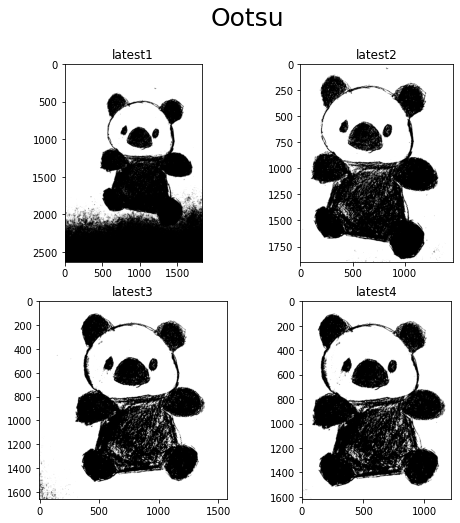

In [ ]:
# 大津の２値化

import cv2
import numpy as np
    
# 入力画像を読み込み
img1 = cv2.imread('drive/My Drive/latest1.JPG', 0)

gamma_img = gamma_correction(img1) #ガンマ補正（明るくする）
hist_img = cv2.equalizeHist(img1) # ヒストグラム均一化（コントラストを高くする）

img2 = cv2.imread('drive/My Drive/latest2.JPG', 0)
img3 = cv2.imread('drive/My Drive/latest3.JPG', 0)
img4 = cv2.imread('drive/My Drive/latest4.JPG', 0)

# グレースケール変換
# gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
# 方法2       
ret, th1 = cv2.threshold(img1, 0, 255, cv2.THRESH_OTSU)
ret, th2 = cv2.threshold(img2, 0, 255, cv2.THRESH_OTSU)
ret, th3 = cv2.threshold(img3, 0, 255, cv2.THRESH_OTSU)
ret, th4 = cv2.threshold(img4, 0, 255, cv2.THRESH_OTSU)
ret, g_th = cv2.threshold(gamma_img, 0, 255, cv2.THRESH_OTSU)
ret, h_th = cv2.threshold(hist_img, 0, 255, cv2.THRESH_OTSU)

# plt.figure(figsize=(4, 4), dpi=50)

# 結果を出力
fig = plt.figure(figsize=(8, 8))
fig.suptitle('Ootsu', fontsize=25)
ax = fig.add_subplot(2, 2, 1)
ax.set_title('latest1')
ax.imshow(th1)

ax = fig.add_subplot(2, 2, 2)
ax.set_title('latest2')
ax.imshow(th2)

ax = fig.add_subplot(2, 2, 3)
ax.set_title('latest3')
ax.imshow(th3)

ax = fig.add_subplot(2, 2, 4)
ax.set_title('latest4')
ax.imshow(th4)




# fig = plt.figure()
# ax = fig.add_subplot(1, 1, 1)
# ax.imshow(g_th)

# fig = plt.figure()
# ax = fig.add_subplot(1, 1, 1)
# ax.imshow(h_th)

# fig = plt.figure()
# ax = fig.add_subplot(1, 1, 1)
# ax.imshow(th2)
# fig = plt.figure()
# ax = fig.add_subplot(1, 1, 1)
# ax.imshow(th3)
# fig = plt.figure()
# ax = fig.add_subplot(1, 1, 1)
# ax.imshow(th4)

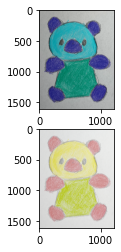

In [ ]:
# ガンマ補正
# 全体的に画像を明るくする

import cv2
import numpy as np


# 貰ったBGRイメージをガンマ補正して返す
def gamma_correction(img):

  gamma = 3.1 # gammaはパラメータで、1.0より大きいと明るく、小さいと暗くなる

  lookUpTable = np.zeros((256, 1), dtype = 'uint8')

  for i in range(256):
    lookUpTable[i][0] = 255 * pow(float(i) / 255, 1.0 / gamma)

  img_gamma = cv2.LUT(img, lookUpTable)

  return img_gamma


img_src = cv2.imread('drive/My Drive/latest4.JPG')
img_gamma = gamma_correction(img_src)


import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(2, 1, 1)
ax.imshow(img_src)
ax = fig.add_subplot(2, 1, 2)
ax.imshow(cv2.cvtColor(img_gamma, cv2.COLOR_BGR2RGB))

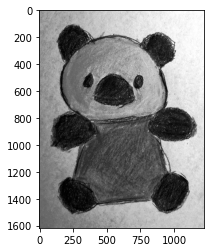

In [ ]:
# ヒストグラム均一化
# コントラストを高める

import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

## 原画像の読み込み
img = cv2.imread('drive/My Drive/latest4.JPG')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

hist_img = cv2.equalizeHist(gray)

plt.gray()
plt.imshow(hist_img)

<Figure size 432x288 with 0 Axes>

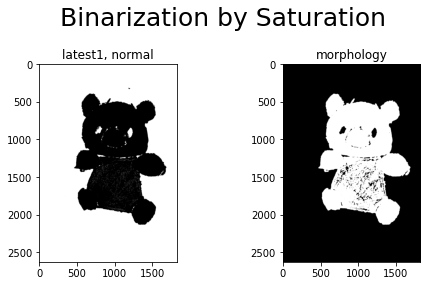

In [ ]:
# HSVのSで２値化、モルフォロジー変換

import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

## 原画像の読み込み
img = cv2.imread('drive/My Drive/latest1.JPG')
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

halue = hsv[:, :, 0]
s = hsv[:, :, 1]
value = hsv[:, :, 2]

plt.gray()
s[s < 30] = 255
s[(s > 30) & (s != 255)] = 0

fig = plt.figure(figsize=(8, 8))
fig.suptitle('Binarization by Saturation', fontsize=25)
ax = fig.add_subplot(2, 2, 1)
ax.set_title('latest1, normal')
ax.imshow(s)

# kernel = np.ones((3, 3), np.uint8)
kernel = np.ones((10, 10), np.uint8)

# 膨張・収縮処理(方法2)
# dilate = cv2.dilate(gray, kernel)
# erode = cv2.erode(dilate, kernel)

mor = cv2.morphologyEx(s, cv2.MORPH_CLOSE, kernel)

ax = fig.add_subplot(2, 2, 2)
ax.set_title('morphology')
mor = ~mor
ax.imshow(mor)

# print(s[400, 600])

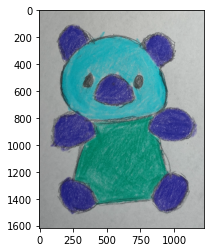

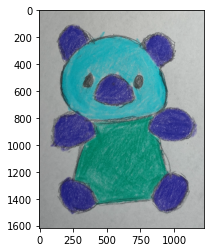

In [ ]:
# matplotlibの扱い方

import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('drive/My Drive/latest4.JPG')

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.imshow(img)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.imshow(img)

